In [1]:
# Logistic regression model for Titanic servival prediction

# Code by : Chhayank Thanki (216270307017)
#           Vara Aditya (216270307032)

# Importing needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For Data Visualization
from sklearn.model_selection import train_test_split # Split dataset into train 
                                                     # and test data
from sklearn.metrics import accuracy_score # Find the accuracy of trained model
from sklearn.preprocessing import StandardScaler # Removes the mean and scales 
                                                 # each feature/variable to unit 
                                                 # variance.

In [2]:
# Implementation of Logistic Regression
class LogisiticRegression:
    
    # Function to initialize learning rate, epochs, weights and bias
    def __init__(self, learning_rate = 0.02, epochs = 100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    # Fit function to train model using logistic regression 
    def fit(self, X, Y):
        self.no_ex,self.no_features = X.shape
        self.weights = np.zeros(self.no_features)
        self.bias = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.epochs):
            self.update_weights()
            
    # To update the weights
    def update_weights(self):
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.weights) + self.bias)))
        dw = (1 / self.no_ex) * np.dot(self.X.T,(Y_hat - self.Y))
        db = (1 / self.no_ex) * np.sum(Y_hat - self.Y)
        
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
    
    # Predict function to predict values from trained model
    def predict(self, X):
        Y_pred = 1 /(1 + np.exp(-(X.dot(self.weights) + self.bias)))
        Y_pred = np.where( Y_pred > 0.5,1,0)
        return Y_pred


In [3]:
# Reading dataset csv file
data_set = pd.read_csv("../input/titanic-dataset/Titanic-Dataset.csv")

# Take a look at the training and testing data
data_set.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Axes: xlabel='Sex', ylabel='Survived'>

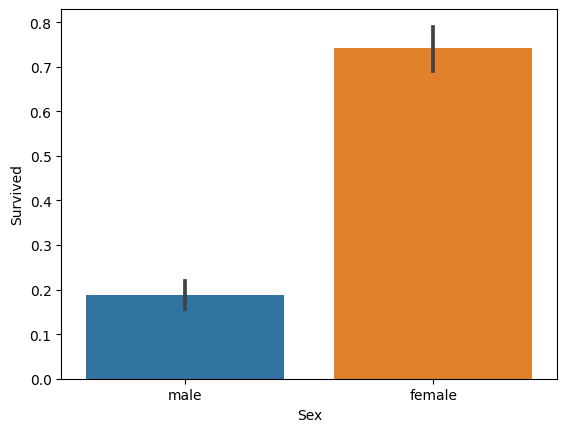

In [4]:
# Data Visualization

# Sex feature 
# Draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data = data_set)

<Axes: xlabel='Pclass', ylabel='Survived'>

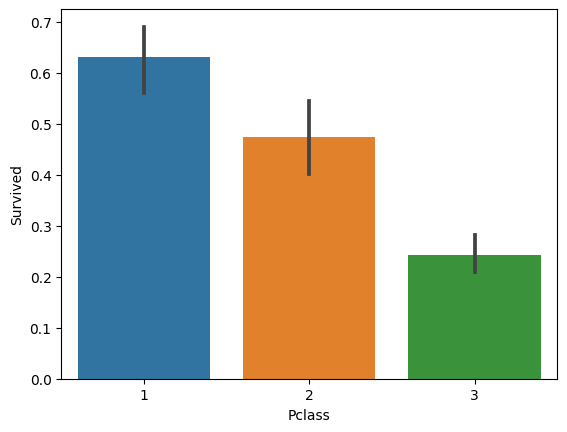

In [5]:
# Pclass feature
# Draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data = data_set)

<Axes: xlabel='Parch', ylabel='Survived'>

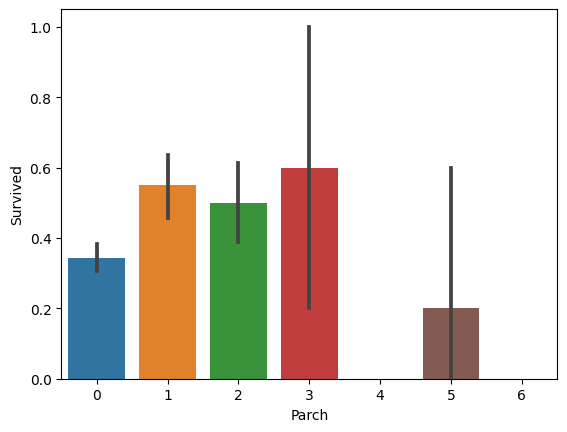

In [6]:
# Parch feature
# Draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data = data_set)

In [7]:
# Data cleaning 

# Dropping features because there are not a lot more useful information can be 
# extracted from it.

data_set = data_set.drop(['Name'], axis=1)
data_set = data_set.drop(['Ticket'], axis=1)
data_set = data_set.drop(['Cabin'], axis=1)

In [8]:
# Embarked feature
# Replacing the missing values in the Embarked feature with S, 
# because S have the most survival rate
data_set = data_set.fillna({"Embarked": "S"})
embarked_mapping = {"S": 1, "C": 2, "Q": 3}# Map Embarked value to a numeric value
data_set['Embarked'] = data_set['Embarked'].map(embarked_mapping)

In [9]:
# Sex feature
data_set.replace({'Sex':{'female':1,'male':0}},inplace=True)

In [10]:
# Fare feture
# Fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(data_set["Fare"])):
    if pd.isnull(data_set["Fare"][x]):
        pclass = data_set["Pclass"][x] # Pclass = 3
        data_set["Fare"][x] = round(data_set[data_set["Pclass"] == pclass]["Fare"].mean(), 4)

data_set['FareBand'] = pd.qcut(data_set['Fare'], 4, labels = [1, 2, 3, 4]) 
# Map Fare values into groups of numerical values

data_set = data_set.drop(['Fare'], axis = 1) # Drop Fare values

In [11]:
# Age feature
data_set['Age'] = data_set['Age'].fillna(29) # 29 is average of average ages of males and females

In [12]:
# Specifying Train features Target feature
features = data_set.drop('Survived',axis=1)
target = data_set['Survived']

scaler =  StandardScaler()
scaler.fit(features)

chngd_data = scaler.transform(features)

features = chngd_data
target = data_set['Survived']

# Spliting data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(features, target, test_size = 0.75, random_state = 0)

In [13]:
# Making instance of linear regression
object1 = LogisiticRegression()

# Fit function to train model
object1.fit(X_train,Y_train)

# Making actual prediction
prediction = object1.predict(X_test)

In [14]:
# Finding model accuracy
accuracy = round(accuracy_score(Y_test,prediction) * 100, 2)
print("Accuracy : ", accuracy)

Accuracy :  76.68
